<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/7_Cross_Validation_in_Decision_Tree__Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation and Grid Search

## Validation Set

In [1]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/main/ml/wine_csv.csv')

In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=17)

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=17)

In [5]:
data.shape

(6497, 3)

In [6]:
test_input.shape

(1300, 3)

In [7]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=17)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input,test_target))

# In Decision Tree, standard scaling is often not necessary because :
# 1. The split point remains the same even after the scaling.
# 2. It is robust to outliers

0.9983160933365408
0.864423076923077
0.8576923076923076


In [ ]:
dt?

## Cross Validation

In [50]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target, cv=5) # default number of folds is 5; cv=5
print(scores)
#if you change the number of folds from default 5 to 10, what would be the average accuracy change into?
#Increasing the number of folds (k) by setting k=10 instead of default 5 can reduce "bias" but increase "variance".

{'fit_time': array([0.03261209, 0.07236838, 0.05556464, 0.06172848, 0.04080009]), 'score_time': array([0.00177383, 0.01307869, 0.00386095, 0.0017004 , 0.00175261]), 'test_score': array([0.85      , 0.8625    , 0.8479307 , 0.84985563, 0.85466795])}


In [11]:
cross_validate?

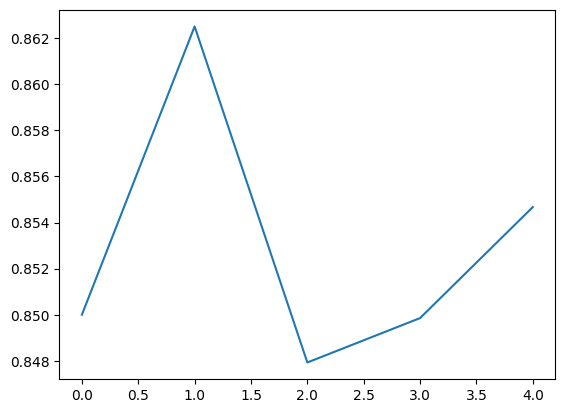

In [27]:
import matplotlib.pyplot as plt
plt.plot(scores['test_score'])

In [28]:
import numpy as np
print(np.mean(scores['test_score']))


0.8529908565928779


In [29]:
train_target.shape

(5197,)

In [30]:
np.unique(train_target, return_counts=True)

(array([0., 1.]), array([1283, 3914]))

In [31]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8529908565928779


In [33]:
# when more complex specification is needed for cv parameter.
# setting cv=StratifiedKFold(n_splits=10) in cross_validate is equivalent to setting cv=10 in the default cross-validation method.
scores = cross_validate(dt, train_input, train_target, verbose=10,cv=5) # default number of folds is 5; cv=5
print(scores)
print(np.mean(scores['test_score']))

[CV] START .....................................................................
[CV] END ......................................., score=0.850 total time=   0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.863 total time=   0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.848 total time=   0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.850 total time=   0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.855 total time=   0.0s
{'fit_time': array([0.01289654, 0.00783539, 0.00732875, 0.00705671, 0.00800252]), 'score_time': array([0.00111866, 0.00102115, 0.00086093, 0.00081086, 0.00092363]), 'test_score': array([0.85

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s


## Tuning the Hyperparameter

In [49]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=17), params, n_jobs=-1)

# By default, GridSearchCV(), additionally performs cross-validation to evaluate the performance for each combination of parameters.
# it will train 25 models = 5 params x 5 folds(default)
# n_jbs=-1 means to use all cores available in your computer.

In [ ]:
GridSearchCV?

In [42]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [43]:
dt_gs = gs.best_estimator_
print(dt_gs.score(train_input, train_target))

# Once Scikit-learn's grid search has completed training,
# it automatically retrains the model using the entire training set
# with the parameter combination that yielded the highest validation score out of the 25 models.
# This best-performing "model" is saved in the "best_estimator_" attribute of the grid search object.
# You can use this model just as a regular decision tree.

0.911487396574947


In [44]:
gs.score(train_input, train_target)

0.911487396574947

In [45]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0003}


In [47]:
gs.cv_results_

{'mean_fit_time': array([0.00927424, 0.00860929, 0.00789943, 0.00739694, 0.00666409]),
 'std_fit_time': array([0.00059344, 0.00051965, 0.00046461, 0.00059335, 0.00076874]),
 'mean_score_time': array([0.00193467, 0.00149941, 0.00144544, 0.00142999, 0.00136008]),
 'std_score_time': array([3.68359516e-04, 7.65288729e-05, 8.94467710e-05, 6.30769954e-05,
        2.16851815e-04]),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_impurity_decrease': 0.0001},
  {'min_impurity_decrease': 0.0002},
  {'min_impurity_decrease': 0.0003},
  {'min_impurity_decrease': 0.0004},
  {'min_impurity_decrease': 0.0005}],
 'split0_test_score': array([0.85961538, 0.86826923, 0.87115385, 0.87211538, 0.8625    ]),
 'split1_test_score': array([0.87980769, 0.875     , 0.87596154, 0.86538462, 0.87115385]),
 'split2_test_score': array([0.85466795, 0.8

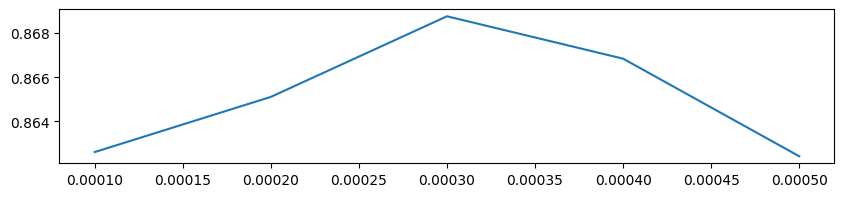

In [46]:
#  draw a plot of scores to verify the relative performance of the best params
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
plt.plot(params['min_impurity_decrease'], gs.cv_results_['mean_test_score'])

In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86261031 0.86511198 0.8687686  0.86684552 0.86241893]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0003}


### Adding more hyperparameter combinations

In [ ]:
params_1 = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9 variations
          'max_depth': range(5, 20, 1), # 15 variations
          'min_samples_split': range(2, 100, 10) # 10 varitions
          }
          # total 1350 combinations of parameters created (=9 x 15 x 10)
          # by defaults 5 folds cross validated
          # hence, 6750 (=5 x 1350) models will be generated to be tested for cross validation

In [ ]:
gs_1 = GridSearchCV(DecisionTreeClassifier(random_state=17), params_1, n_jobs=-1)
gs_1.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs_1.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.00030000000000000003, 'min_samples_split': 12}


In [ ]:
print(np.max(gs_1.cv_results_['mean_test_score']))

0.8695385725919893


In [ ]:
gs_1.cv_results_['mean_test_score'].shape

(1350,)

### Random Search

  + Random Search tests a random subset of the parameter space, making it faster and more suitable for high-dimensional parameter space.
  + Random Search is computationally less expensive but can uncover effective parameters in regions of the space that Grid Search might not identify too.

In [ ]:
# To execute a random search, we need a random number generator (random number from a uniform distribution)
# Uniform distribution: probability distribution in which all outcomes are equally likely to occur.
from scipy.stats import uniform, randint
rgen = randint(0, 10) # random integer (discrete)
rgen.rvs(10)

array([4, 6, 8, 6, 9, 0, 0, 5, 9, 6])

In [ ]:
ugen = uniform(0, 1) # random real number (continuous)
ugen.rvs(10)

array([0.11768223, 0.55113671, 0.19314325, 0.6371639 , 0.77490739,
       0.67894745, 0.2725731 , 0.55483685, 0.19864887, 0.03884707])

In [ ]:
params_rs = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

cv_rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=17), params_rs,
                        n_iter=100, n_jobs=-1, random_state=17)
cv_rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5daa23b220>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5daa776d40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5de217b3a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5daa23bf40>},
                   random_state=17)

In [ ]:
print(cv_rs.best_params_)

{'max_depth': 29, 'min_impurity_decrease': 0.0003644157033458697, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [ ]:
print(np.max(cv_rs.cv_results_['mean_test_score']))

0.8685772192196639


In [ ]:
dt_rs = cv_rs.best_estimator_

print(dt_rs.score(test_input, test_target))

0.8746153846153846


In [ ]:
tree.plot_tree?

Object `tree.plot_tree` not found.


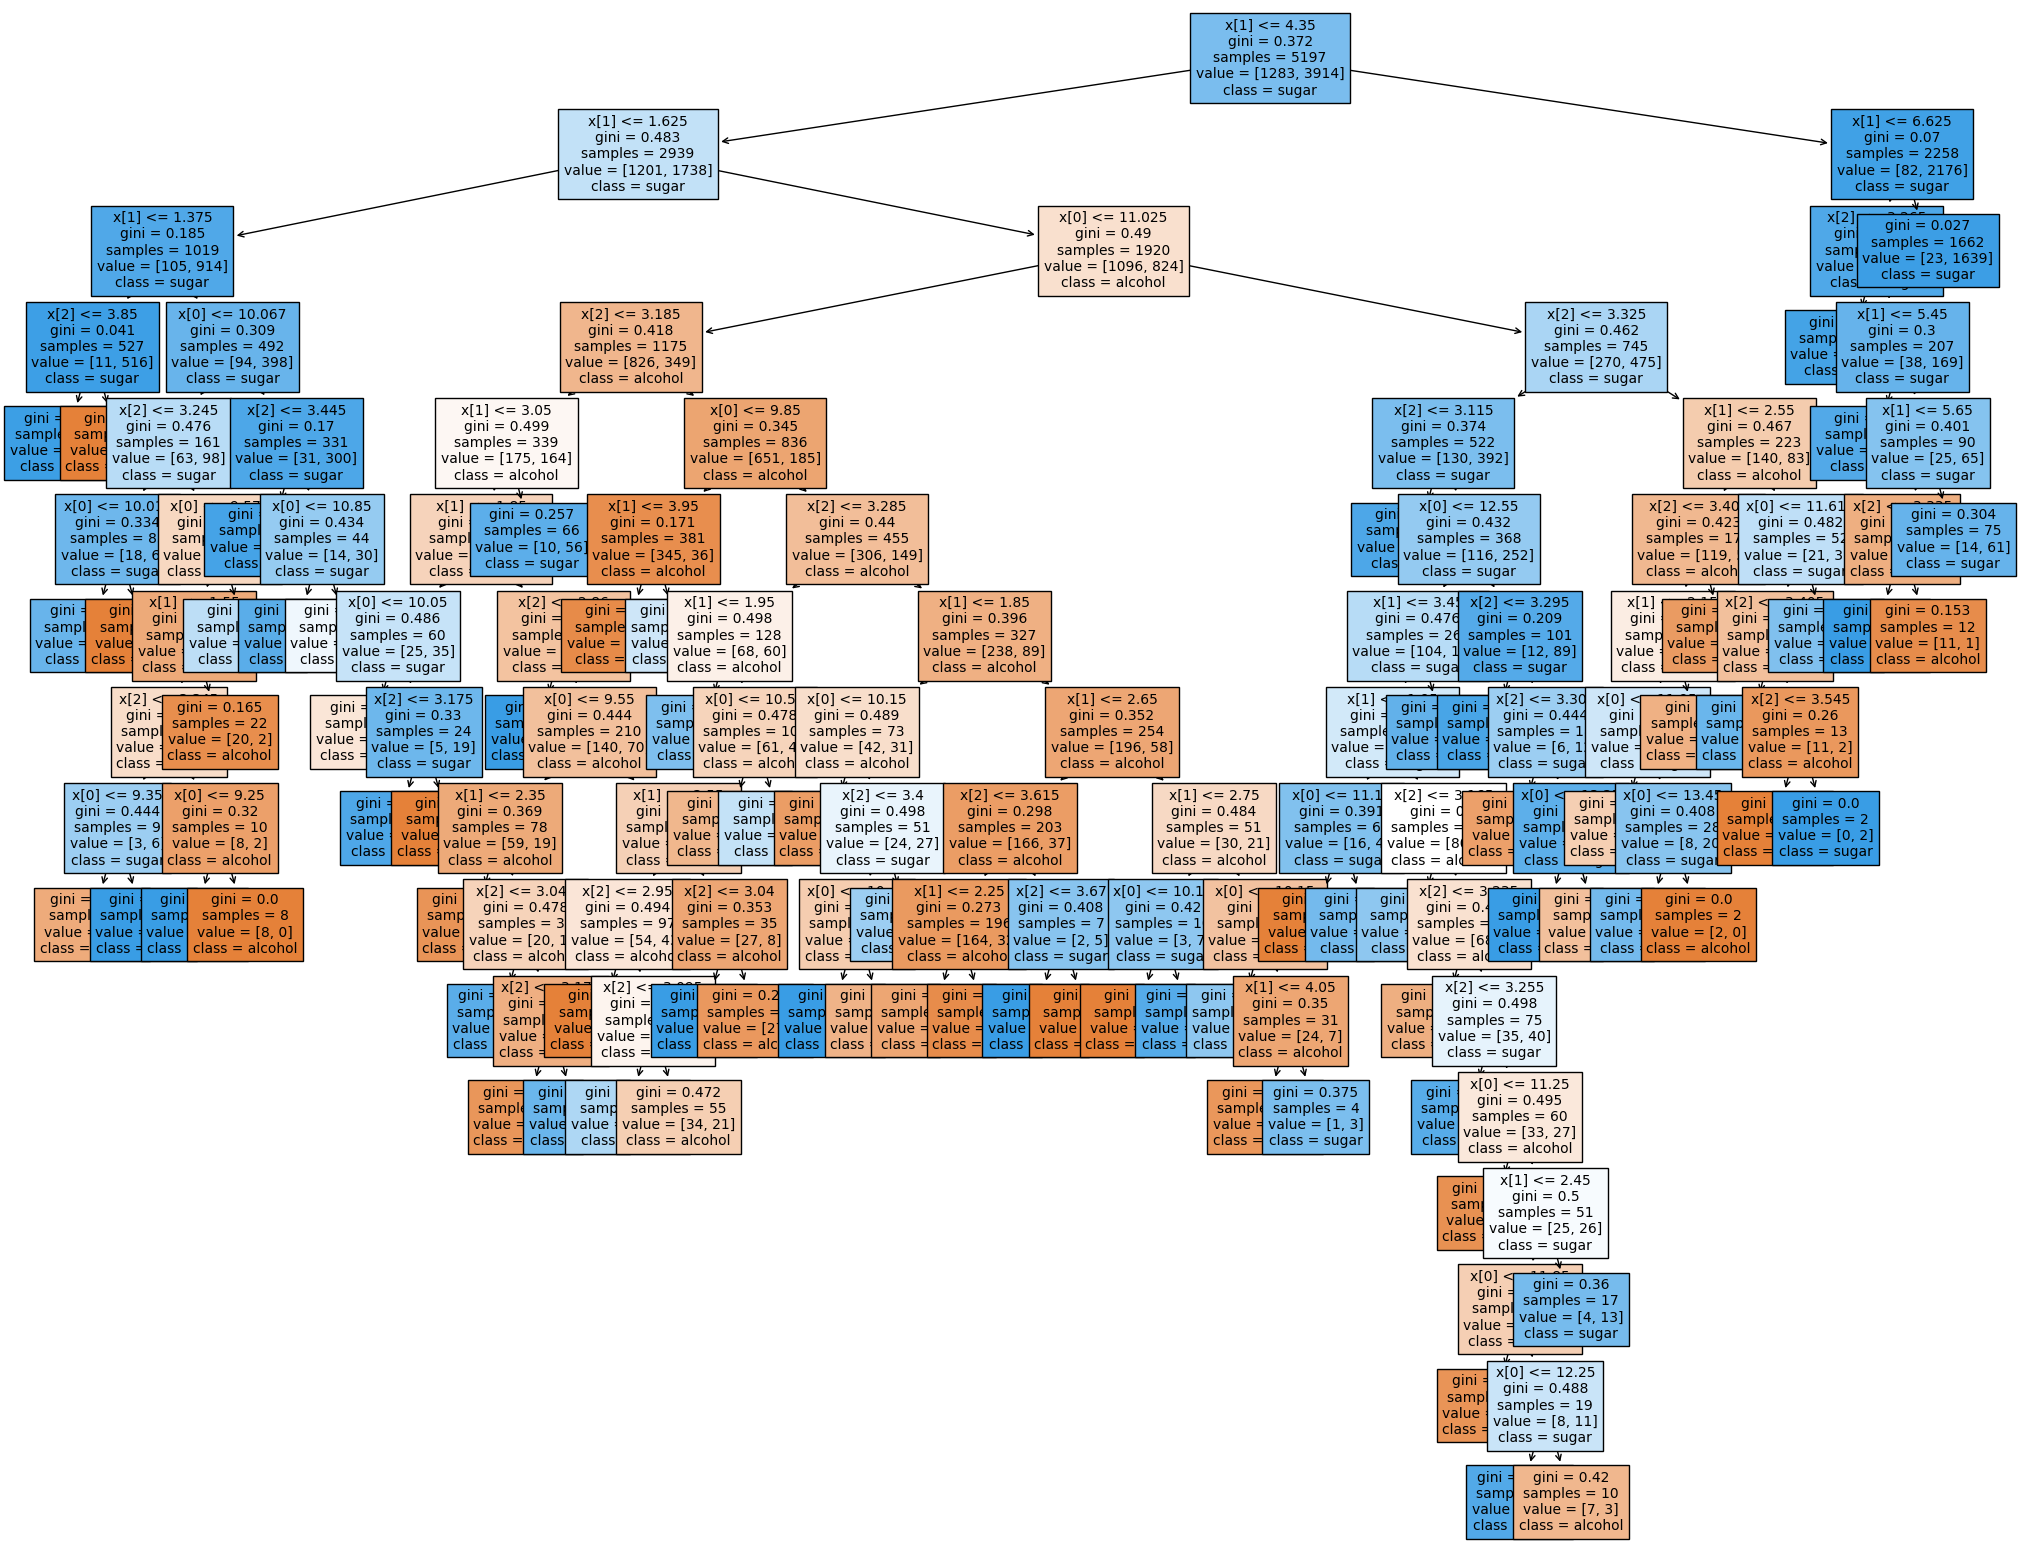

In [ ]:
# Draw dt_rs plot_tree

from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dt_rs, fontsize=10, class_names=(['alcohol', 'sugar', 'pH']), filled=True)
plt.show()
